In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error
from pycaret.regression import *
from scipy import stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df['Alley'] = df['Alley'].replace({np.nan: 'None'})
df['MasVnrType'] = df['MasVnrType'].replace({np.nan: 'None'})
df['MasVnrArea'] = df['MasVnrArea'].replace({np.nan: 0.0})
df['BsmtQual'] = df['BsmtQual'].replace({np.nan: 'None'})
df['BsmtCond'] = df['BsmtCond'].replace({np.nan: 'None'})
df['BsmtExposure'] = df['BsmtExposure'].replace({np.nan: 'None'})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({np.nan: 'None'})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({np.nan: 'None'})
df['Electrical'] = df['Electrical'].replace({np.nan: 'None'})
df['FireplaceQu'] = df['FireplaceQu'].replace({np.nan: 'None'})
df['GarageType'] = df['GarageType'].replace({np.nan: 'None'})
df['GarageYrBlt'] = df['GarageYrBlt'].replace({np.nan: 'None'})
df['GarageFinish'] = df['GarageFinish'].replace({np.nan: 'None'})
df['GarageQual'] = df['GarageQual'].replace({np.nan: 'None'})
df['GarageCond'] = df['GarageCond'].replace({np.nan: 'None'})
df['PoolQC'] = df['PoolQC'].replace({np.nan: 'None'})
df['Fence'] = df['Fence'].replace({np.nan: 'None'})
df['MiscFeature'] = df['MiscFeature'].replace({np.nan: 'None'})

In [4]:
df_to_impute = df.copy()

In [5]:
X = df_to_impute.select_dtypes(['float64','int64']).drop('SalePrice', axis = 1)

In [6]:
imputer = IterativeImputer(estimator = BayesianRidge(), n_nearest_features = None, imputation_order = 'ascending')

In [7]:
imputer.fit(X)

IterativeImputer(estimator=BayesianRidge())

In [8]:
X_imputed = imputer.transform(X)

In [9]:
df_X_imputed = pd.DataFrame(X_imputed, columns = X.columns.tolist())

In [10]:
df['LotFrontage'] = df_X_imputed['LotFrontage']

In [11]:
categories = df.select_dtypes('object').columns.tolist()
numerics = df.select_dtypes(['int64','float64']).columns.tolist()
numerics.remove('SalePrice')

In [12]:
regression_setup = setup(data = df, target = 'SalePrice', train_size = 0.8, sampling = False, 
                         categorical_features = categories, numeric_features = numerics, 
                         high_cardinality_features = ['GarageYrBlt'], high_cardinality_method = 'frequency',  
                         ignore_features = ['Id'], 
                         normalize = True, normalize_method = 'zscore', 
                         handle_unknown_categorical = True, unknown_categorical_method = 'least_frequent', 
                         combine_rare_levels = True, rare_level_threshold = 0.05,  
                         n_jobs = -1, session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,False
5,Numeric Features,36
6,Categorical Features,44
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [13]:
compare_models(blacklist = ['ard','tr','ransac'], whitelist = None, fold = 10, round = 4, 
               sort = 'MAE', n_select = 1, turbo = False, verbose = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,15208.4277,772405443.5481,26729.9093,0.8842,0.1263,0.0877,6.1191
1,Passive Aggressive Regressor,16340.9143,1080001298.8235,30292.4855,0.8310,0.1414,0.0964,0.5394
2,Huber Regressor,16614.3624,1077057498.4449,30262.0558,0.8300,0.1517,0.1004,0.2393
3,Gradient Boosting Regressor,16854.0558,835724408.5493,28126.1672,0.8711,0.1361,0.0976,0.6788
4,Light Gradient Boosting Machine,17121.8528,945072144.0111,29899.8410,0.8554,0.1421,0.0985,0.2273
5,Extra Trees Regressor,18143.4056,1049955223.0339,31369.4458,0.8394,0.1493,0.1061,0.8118
6,Random Forest,18326.9919,988149520.4574,30696.5731,0.8468,0.1514,0.1083,0.7030
7,Extreme Gradient Boosting,18337.1157,1022399822.3345,30824.1068,0.8458,0.1448,0.1039,0.5154
8,Bayesian Ridge,18497.0972,1263066699.9989,33162.2440,0.8013,0.1612,0.1102,0.1251
9,Lasso Least Angle Regression,19137.4189,1459381869.6139,35967.7397,0.7693,0.1817,0.1113,0.0607


In [14]:
aml = automl(optimize = 'RMSLE', use_holdout = False)

In [15]:
aml_all_predictions = predict_model(estimator = aml, data = df)

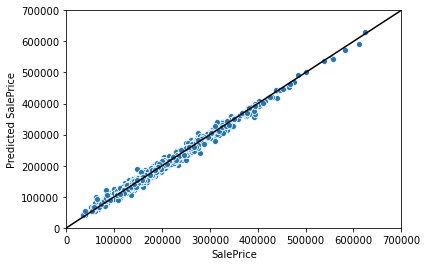

In [16]:
sns.scatterplot(data = aml_all_predictions, x = 'SalePrice', y = 'Label')
plt.plot(np.arange(0,700000), np.arange(0,700000), c = 'black')
plt.ylabel('Predicted SalePrice')
plt.xlim(0,700000)
plt.ylim(0,700000)
plt.show()

In [17]:
cb_final = finalize_model(aml)